## Nombres
#### Celic Gabriel Hernández Archundia
#### Diego Iván García Zarza
#### Diego Alfredo López Malerva
#### Emilio Sonck Patiño
#### Iván Gutiérrez Gómez
#### Luis Fernando Lezama Araoz


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd #Biblioteca para importar datos.
import numpy as np #Biblioteca para crear arreglos.
import matplotlib.pyplot as plt #Biblioteca para plotear.
from sklearn.cluster import KMeans #Biblioteca para crear el algoritmo K-means (k-medias) para agrupamiento de datos
import seaborn as sns #Biblioteca para plotear datos con plantillas específicas.
from IPython.display import Image #Biblioteca para mostrar imágenes.
from google.colab import drive #Biblioteca para importar datos desde google drive.

import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation
from keras.layers import Dropout, Dense, Flatten, BatchNormalization

import PIL # Checar para adquirir las imágenes

datos = pd.read_csv("/content/drive/MyDrive/Tecmilenio/Hackaton/Iris.csv")
datos.head(n = 5) # Nombres de las columnas y primeros 5 registros

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = pd.DataFrame()
X.loc[:,0] = datos.loc[:,'PetalLengthCm']
X.loc[:,1] = datos.loc[:,'PetalWidthCm']

cls = KMeans(init='k-means++', n_clusters=3, n_init=10)
cls.fit(X)
X['predicted_label'] = cls.labels_.astype(int)
X.columns = ['PetalLengthCm', 'PetalWidthCm','label']
X

,PetalLengthCm,PetalWidthCm,label
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


[[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


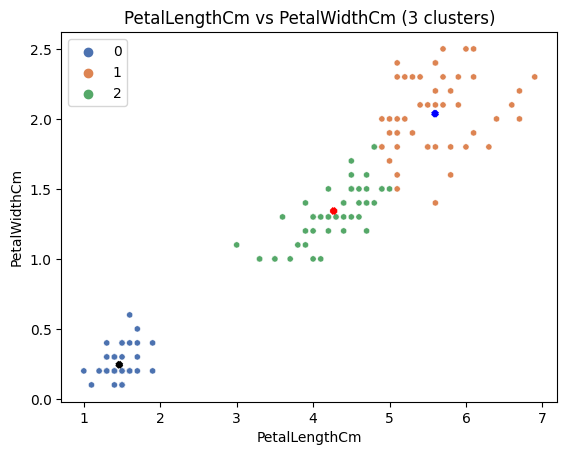

In [4]:
centroids = cls.cluster_centers_
labels = cls.labels_
print(centroids)
centroids_x = centroids[:, 1]
centroids_y = centroids[:, 0]

sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="label",
                data=X, palette='deep', s=20);
plt.legend(loc='upper left');
plt.title("PetalLengthCm vs PetalWidthCm (3 clusters)")
#plt.xlim([-5, 5])
#plt.ylim([-5, 7])
plt.scatter(centroids_y,centroids_x,marker = "x", s=5,linewidths = 5, zorder = 5, c=['black','blue','red'])